In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import plotly.express as px 
import numpy as np

In [2]:
df=pd.read_csv("bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11158,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11159,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11160,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


## Answer Questions

### 1. What is the share of clients attracted in our source data?

In [31]:
df["campaign"].sum()

27999

In [25]:
df["previous"].sum()

9293

### 3. What is the average call duration for the attracted clients?

In [28]:
average_call_duration = df['duration'].mean()
print(f"Average call duration for attracted clients: {average_call_duration:.2f} minutes")

Average call duration for attracted clients: 371.99 minutes


### 4. What is the average age among the attracted and unmarried clients?

In [33]:
attracted_unmarried = df[(df['campaign'] == 1) & (df['marital'] == 'single')]

average_age = attracted_unmarried['age'].mean()
print(f"Average age among attracted and unmarried clients: {average_age:.2f} years")

Average age among attracted and unmarried clients: 32.58 years


### 5. What is the average age and call duration for different types of client employment?

In [39]:
employment_stats = df.groupby('poutcome').agg({
    'age': 'mean',
    'duration': 'mean'
}).reset_index()

print("Average age and call duration by employment type:")
print(employment_stats)

Average age and call duration by employment type:
  poutcome        age    duration
0  failure  40.958469  338.460098
1    other  40.240223  358.433892
2  success  43.503268  347.937442
3  unknown  41.044079  380.908720


## Visual Analysis

### 1. Share of Attracted Clients

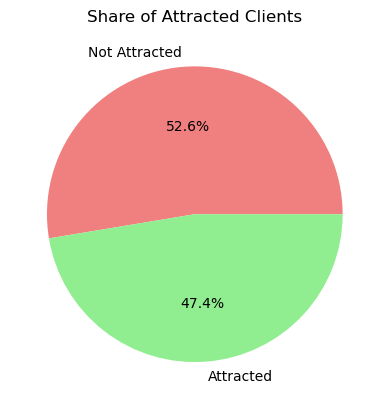

In [53]:
attracted_clients = df['deposit'].value_counts()
plt.pie(attracted_counts, labels=['Not Attracted', 'Attracted'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Share of Attracted Clients')
plt.show()

### 2. Distribution of Age Among Attracted Clients

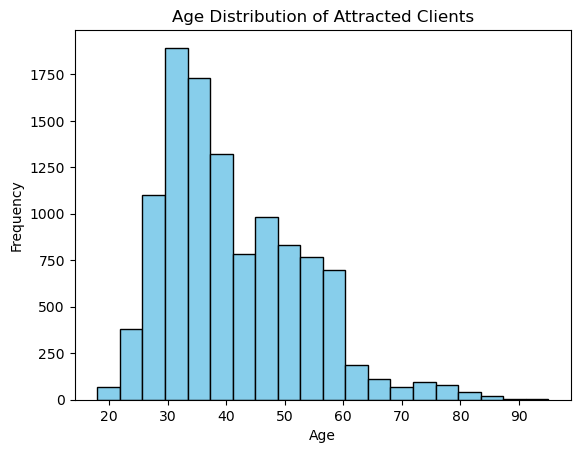

In [58]:
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Attracted Clients')
plt.show()

### 3. Average Call Duration by Employment Type

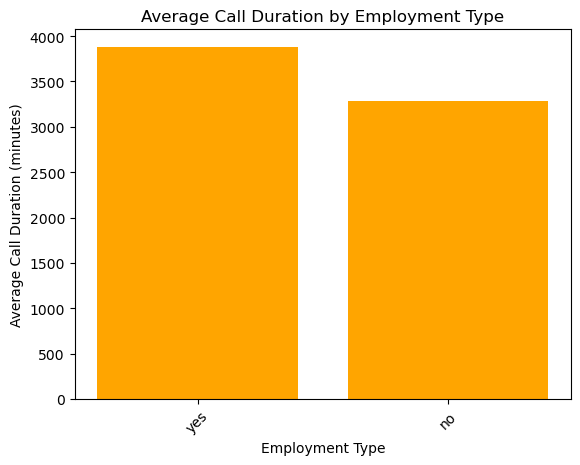

In [65]:
plt.bar(df['deposit'], df['duration'], color='orange')
plt.xlabel('Employment Type')
plt.ylabel('Average Call Duration (minutes)')
plt.title('Average Call Duration by Employment Type')
plt.xticks(rotation=45)
plt.show()

## Insights and Recommendations
### Based on the analysis, you can derive insights such as:
### - Which employment types have the highest call duration.
### - The age group most likely to be attracted.
### - The overall effectiveness of the marketing campaign.